# Diamonds_XGboost_CV_AllKnown_BalancedData_Metrics_Top5Craton
By Vivian Zeng       01/12/2021

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, r2_score, make_scorer, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

import pickle

In [2]:
ls

20201216.Rmd
20201216金刚石数据库.xlsx
20201217_warpup.docx
20201217_warpup.pdf
Construct Covariance Matrix-Standardization.ipynb
Construct Covariance Matrix.ipynb
Diamind9000MissingIDs_XZ_20201216.csv
Diamind_XZ_20201215_AllKnown.csv
Diamind_XZ_20201216_Unknown.csv
Diamonds_XGboost_CV_AllKnown_20201216.ipynb
Diamonds_XGboost_CV_AllKnown_BalancedData.ipynb
Diamonds_XGboost_CV_AllKnown_BalancedData_Classification_Metric_Top5_Craton.ipynb
Diamonds_XGboost_CV_AllKnown_BalancedData_Classification_Metric_Top5_Craton_ResamplingEvaluation.ipynb
X_o_train_Top5Craton_Oversampling
X_train_Top5Craton_Oversampling
__pycache__/
demo_test_imputation_hypo&plots.ipynb
diamond20201216.csv
earth_data_plot.py
monte_carlo_simulator.py
y_o_train_Top5Craton_Oversampling
y_train_Top5Craton_Oversampling


In [3]:
df_raw = pd.read_csv("Diamind_XZ_20201215_AllKnown.csv")
df_raw.head()

Unnamed: 0    craton        Si         Ti        Al        Cr    V  \
0           1  Amazonia  0.000000  30.353616  0.008470  0.027368  0.0   
1           2  Amazonia  0.014000  32.007960  0.047646  0.027368  0.0   
2           3  Amazonia  0.070000   0.689310  1.138210  2.155230  0.0   
3           4  Amazonia  0.004667  30.101868  0.008470  0.027368  0.0   
4           5  Amazonia  0.028000  32.463504  0.068822  0.027368  0.0   

         Mn      Mg        Ca   Sr   Ba        Na    P         K         Fe  \
0  0.363968   0.270  0.017143  0.0  0.0  0.023741  0.0  0.026553  37.022328   
1  0.394944   0.342  0.028572  0.0  0.0  0.023741  0.0  0.033192  33.281206   
2  0.201344  29.868  0.017143  0.0  0.0  0.023741  0.0  0.026553  36.368993   
3  0.565312   0.072  0.021429  0.0  0.0  0.023741  0.0  0.026553  35.941214   
4  0.325248   0.300  0.017143  0.0  0.0  0.023741  0.0  0.026553  31.290089   

    Co        Ni    S   Zn  Cr_trace  Co_trace  Ni_trace  Sr_trace  Y_trace  \
0  0.0  0.037718  0.0  0.0     136.0      79.0      31.0       0.2    0.300   
1  0.0  0.094296  0.0  0.0     260.0      56.0     181.0       0.4    0.800   
2  0.0  0.809374  0.0  0.0    4172.0     429.0    6375.0       1.6    0.144   
3  0.0  0.037718  0.0  0.0    2944.0     155.0     790.0       0.2    0.300   
4  0.0  0.055006  0.0  0.0     153.0      53.0      13.0       0.3    0.500   

   Zr_trace  Nb_trace  Ba_trace  La_trace  Ce_trace  Nd_trace  Sm_trace  \
0      27.4     335.0      4.00     0.600     2.100      0.60     0.192   
1      56.6     227.0      3.20     0.700     2.400      2.50     0.312   
2      25.2       4.8      0.56     0.096     0.056      0.32     0.400   
3     348.7     646.0      2.30     0.500     1.900      0.70     0.300   
4      68.7     205.0      8.80     0.800     2.900      0.70     0.100   

   Eu_trace  Dy_trace  Er_trace  Yb_trace  Ti_trace  Fe_trace  Al_trace  \
0    0.0760    0.1472     0.224    0.1000       NaN       NaN       NaN   
1    0.1112    0.1288     0.392    0.3280       NaN       NaN       NaN   
2    0.1600    0.3200     0.640    0.3200       NaN       NaN       NaN   
3    0.0688    0.1864     0.248    0.1544       NaN       NaN       NaN   
4    0.0000    0.1000     0.256    0.5000       NaN       NaN       NaN   

   Ca_trace  Mn_trace  Mg_trace  NAs  
0    55.640    2706.0       NaN   48  
1    97.424    3251.0       NaN   48  
2   156.800    1887.0       NaN   48  
3    71.488    2397.0       NaN   48  
4    67.304    2898.0       NaN   48

### Data Preprocessing

In [4]:
df = df_raw.copy()
df.shape

(2144, 43)

In [5]:
df.columns #Keep NA to see NA's impact

Index(['Unnamed: 0', 'craton', 'Si', 'Ti', 'Al', 'Cr', 'V', 'Mn', 'Mg', 'Ca',
       'Sr', 'Ba', 'Na', 'P', 'K', 'Fe', 'Co', 'Ni', 'S', 'Zn', 'Cr_trace',
       'Co_trace', 'Ni_trace', 'Sr_trace', 'Y_trace', 'Zr_trace', 'Nb_trace',
       'Ba_trace', 'La_trace', 'Ce_trace', 'Nd_trace', 'Sm_trace', 'Eu_trace',
       'Dy_trace', 'Er_trace', 'Yb_trace', 'Ti_trace', 'Fe_trace', 'Al_trace',
       'Ca_trace', 'Mn_trace', 'Mg_trace', 'NAs'],
      dtype='object')

In [6]:
df.drop(df.columns[df.isna().mean() == 1], axis=1, inplace=True)  # Remove columns that 100% missing 
df.shape

(2144, 43)

In [7]:
df=df.drop(df.columns[0], axis=1)

In [8]:
df=df.drop('NAs', axis=1)

In [9]:
df.head()

craton        Si         Ti        Al        Cr    V        Mn      Mg  \
0  Amazonia  0.000000  30.353616  0.008470  0.027368  0.0  0.363968   0.270   
1  Amazonia  0.014000  32.007960  0.047646  0.027368  0.0  0.394944   0.342   
2  Amazonia  0.070000   0.689310  1.138210  2.155230  0.0  0.201344  29.868   
3  Amazonia  0.004667  30.101868  0.008470  0.027368  0.0  0.565312   0.072   
4  Amazonia  0.028000  32.463504  0.068822  0.027368  0.0  0.325248   0.300   

         Ca   Sr   Ba        Na    P         K         Fe   Co        Ni    S  \
0  0.017143  0.0  0.0  0.023741  0.0  0.026553  37.022328  0.0  0.037718  0.0   
1  0.028572  0.0  0.0  0.023741  0.0  0.033192  33.281206  0.0  0.094296  0.0   
2  0.017143  0.0  0.0  0.023741  0.0  0.026553  36.368993  0.0  0.809374  0.0   
3  0.021429  0.0  0.0  0.023741  0.0  0.026553  35.941214  0.0  0.037718  0.0   
4  0.017143  0.0  0.0  0.023741  0.0  0.026553  31.290089  0.0  0.055006  0.0   

    Zn  Cr_trace  Co_trace  Ni_trace  Sr_trace  Y_trace  Zr_trace  Nb_trace  \
0  0.0     136.0      79.0      31.0       0.2    0.300      27.4     335.0   
1  0.0     260.0      56.0     181.0       0.4    0.800      56.6     227.0   
2  0.0    4172.0     429.0    6375.0       1.6    0.144      25.2       4.8   
3  0.0    2944.0     155.0     790.0       0.2    0.300     348.7     646.0   
4  0.0     153.0      53.0      13.0       0.3    0.500      68.7     205.0   

   Ba_trace  La_trace  Ce_trace  Nd_trace  Sm_trace  Eu_trace  Dy_trace  \
0      4.00     0.600     2.100      0.60     0.192    0.0760    0.1472   
1      3.20     0.700     2.400      2.50     0.312    0.1112    0.1288   
2      0.56     0.096     0.056      0.32     0.400    0.1600    0.3200   
3      2.30     0.500     1.900      0.70     0.300    0.0688    0.1864   
4      8.80     0.800     2.900      0.70     0.100    0.0000    0.1000   

   Er_trace  Yb_trace  Ti_trace  Fe_trace  Al_trace  Ca_trace  Mn_trace  \
0     0.224    0.1000       NaN       NaN       NaN    55.640    2706.0   
1     0.392    0.3280       NaN       NaN       NaN    97.424    3251.0   
2     0.640    0.3200       NaN       NaN       NaN   156.800    1887.0   
3     0.248    0.1544       NaN       NaN       NaN    71.488    2397.0   
4     0.256    0.5000       NaN       NaN       NaN    67.304    2898.0   

   Mg_trace  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [10]:
df.craton.value_counts()

Siberia                 695
Kaapvaal                410
Slave                   330
Amazonia                207
Congo                   101
West Africa              98
Superior                 86
Guyana                   57
Alluvial                 38
Wyoming                  35
Zimbabwe                 28
Gawler                   17
Tarim                    12
East European            10
Pohorje                  10
Buffalo Head Terrane      6
Kalahari                  4
Name: craton, dtype: int64

In [11]:
df.craton.nunique()

17

In [12]:
df_top5= df[df.craton.isin(['Siberia','Kaapvaal','Slave','Amazonia', 'Congo'])]

In [13]:
df_top5.shape

(1743, 41)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

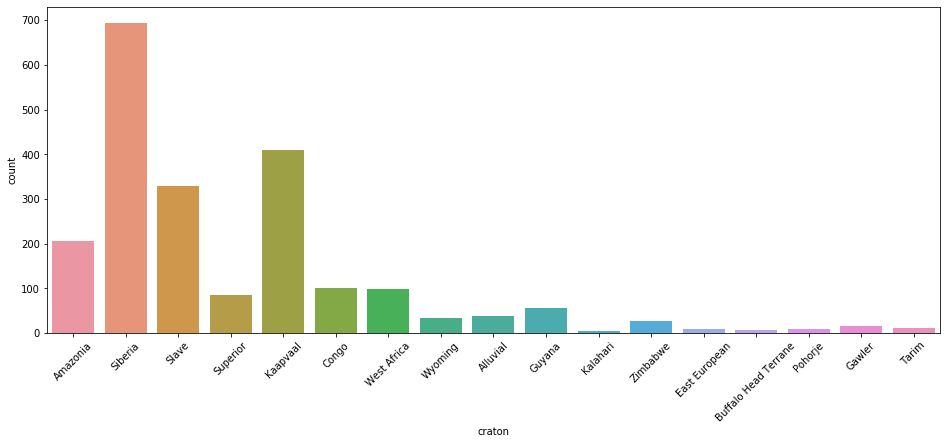

In [14]:
plt.figure(figsize=(16, 6))
sns.countplot(df.craton)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

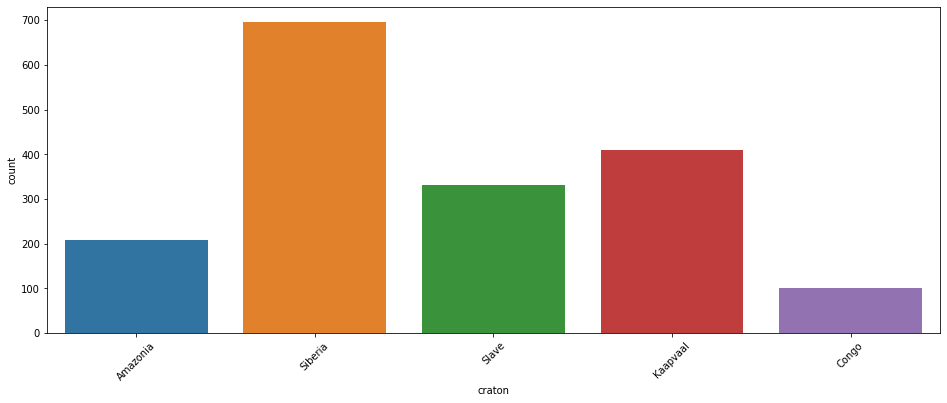

In [15]:
plt.figure(figsize=(16, 6))
sns.countplot(df_top5.craton)
plt.xticks(rotation=45)

In [16]:
#df.craton = le.fit_transform(df.craton.astype(str))
df_top5.craton=df_top5.craton.astype('category')

In [17]:
df_top5.craton.value_counts()

Siberia     695
Kaapvaal    410
Slave       330
Amazonia    207
Congo       101
Name: craton, dtype: int64

In [18]:
df_top5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1743 entries, 0 to 2143
Data columns (total 41 columns):
craton      1743 non-null category
Si          1582 non-null float64
Ti          1582 non-null float64
Al          1582 non-null float64
Cr          1582 non-null float64
V           1464 non-null float64
Mn          1575 non-null float64
Mg          1581 non-null float64
Ca          1582 non-null float64
Sr          1449 non-null float64
Ba          1456 non-null float64
Na          1576 non-null float64
P           1526 non-null float64
K           1581 non-null float64
Fe          1582 non-null float64
Co          1449 non-null float64
Ni          1552 non-null float64
S           1449 non-null float64
Zn          1449 non-null float64
Cr_trace    611 non-null float64
Co_trace    575 non-null float64
Ni_trace    686 non-null float64
Sr_trace    419 non-null float64
Y_trace     293 non-null float64
Zr_trace    344 non-null float64
Nb_trace    317 non-null float64
Ba_trace    361

Missing Value proportions

In [19]:
df.isnull().sum().sum() /(df.shape[0]* df.shape[1])

0.4580110120131052

In [20]:
df_top5.isnull().sum().sum() /(df_top5.shape[0]* df_top5.shape[1])

0.44439780026027453

### Split data into craton and elements

In [21]:
cratons = df_top5.craton.values
cratons=cratons.astype('str')
cratons

array(['Amazonia', 'Amazonia', 'Amazonia', ..., 'Siberia', 'Siberia',
       'Siberia'], dtype='<U8')

In [22]:
le = LabelEncoder()
cratons = le.fit_transform(cratons)
cratons

array([0, 0, 0, ..., 3, 3, 3])

In [23]:
features = df_top5.drop(['craton'], axis=1)
features.shape

(1743, 40)

In [24]:
features.head()

Si         Ti        Al        Cr    V        Mn      Mg        Ca  \
0  0.000000  30.353616  0.008470  0.027368  0.0  0.363968   0.270  0.017143   
1  0.014000  32.007960  0.047646  0.027368  0.0  0.394944   0.342  0.028572   
2  0.070000   0.689310  1.138210  2.155230  0.0  0.201344  29.868  0.017143   
3  0.004667  30.101868  0.008470  0.027368  0.0  0.565312   0.072  0.021429   
4  0.028000  32.463504  0.068822  0.027368  0.0  0.325248   0.300  0.017143   

    Sr   Ba        Na    P         K         Fe   Co        Ni    S   Zn  \
0  0.0  0.0  0.023741  0.0  0.026553  37.022328  0.0  0.037718  0.0  0.0   
1  0.0  0.0  0.023741  0.0  0.033192  33.281206  0.0  0.094296  0.0  0.0   
2  0.0  0.0  0.023741  0.0  0.026553  36.368993  0.0  0.809374  0.0  0.0   
3  0.0  0.0  0.023741  0.0  0.026553  35.941214  0.0  0.037718  0.0  0.0   
4  0.0  0.0  0.023741  0.0  0.026553  31.290089  0.0  0.055006  0.0  0.0   

   Cr_trace  Co_trace  Ni_trace  Sr_trace  Y_trace  Zr_trace  Nb_trace  \
0     136.0      79.0      31.0       0.2    0.300      27.4     335.0   
1     260.0      56.0     181.0       0.4    0.800      56.6     227.0   
2    4172.0     429.0    6375.0       1.6    0.144      25.2       4.8   
3    2944.0     155.0     790.0       0.2    0.300     348.7     646.0   
4     153.0      53.0      13.0       0.3    0.500      68.7     205.0   

   Ba_trace  La_trace  Ce_trace  Nd_trace  Sm_trace  Eu_trace  Dy_trace  \
0      4.00     0.600     2.100      0.60     0.192    0.0760    0.1472   
1      3.20     0.700     2.400      2.50     0.312    0.1112    0.1288   
2      0.56     0.096     0.056      0.32     0.400    0.1600    0.3200   
3      2.30     0.500     1.900      0.70     0.300    0.0688    0.1864   
4      8.80     0.800     2.900      0.70     0.100    0.0000    0.1000   

   Er_trace  Yb_trace  Ti_trace  Fe_trace  Al_trace  Ca_trace  Mn_trace  \
0     0.224    0.1000       NaN       NaN       NaN    55.640    2706.0   
1     0.392    0.3280       NaN       NaN       NaN    97.424    3251.0   
2     0.640    0.3200       NaN       NaN       NaN   156.800    1887.0   
3     0.248    0.1544       NaN       NaN       NaN    71.488    2397.0   
4     0.256    0.5000       NaN       NaN       NaN    67.304    2898.0   

   Mg_trace  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [25]:
features.columns

Index(['Si', 'Ti', 'Al', 'Cr', 'V', 'Mn', 'Mg', 'Ca', 'Sr', 'Ba', 'Na', 'P',
       'K', 'Fe', 'Co', 'Ni', 'S', 'Zn', 'Cr_trace', 'Co_trace', 'Ni_trace',
       'Sr_trace', 'Y_trace', 'Zr_trace', 'Nb_trace', 'Ba_trace', 'La_trace',
       'Ce_trace', 'Nd_trace', 'Sm_trace', 'Eu_trace', 'Dy_trace', 'Er_trace',
       'Yb_trace', 'Ti_trace', 'Fe_trace', 'Al_trace', 'Ca_trace', 'Mn_trace',
       'Mg_trace'],
      dtype='object')

In [26]:
def plot_importance(feature_df, model, n_feature):
    '''
    Input:
        feature_df: The feature dataframe / The X_train with column names
        model: The training model
        n_feature: number of feature importance you want to display
    Output:
        A plot with the top n feature importance in decreasing order
    '''
    vals = model.feature_importances_
    df = pd.DataFrame(vals, index=feature_df.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
    df_n = df.iloc[:n_feature,]
    plt.figure(figsize=(16, 9))
    plt.bar(df_n.index, df_n.Importance)
    plt.xticks(rotation=45)

In [27]:
def get_metrics(mod, X_train, X_test, y_train, y_test):
    """ Returns a data frame of metrics (precision,
        recall, AUC ROC) from training and test sets.
        Assumes model has decision_function() method.
        This will at least work for SVC, LDA, QDA.
    """
    pred_train = mod.predict(X_train)
    pred_test = mod.predict(X_test)
    recall_train = recall_score(y_train, pred_train,average='weighted')
    recall_test = recall_score(y_test, pred_test, average='weighted')
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred_test, average='weighted')
    #rocauc_train = roc_auc_score(y_train, pred_train, average='weighted', multi_class='ovr')
    #rocauc_test = roc_auc_score(y_test, pred_test,average='weighted',multi_class='ovr')
    metrics = {'Set':['Train', 'Test'],
               'Recall':[recall_train, recall_test],
               'Precision':[precision_train, precision_test],
               #'ROC AUC':[rocauc_train, rocauc_test]}
              }
    return pd.DataFrame(metrics)

### Split into training set and test set

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features, cratons, test_size=0.2, 
                                                    stratify = cratons, random_state = 2020)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1394, 40), (349, 40), (1394,), (349,))

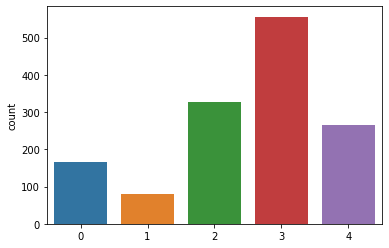

In [29]:
sns.countplot(y_train)

In [30]:
from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight('balanced',
                                             np.unique(df['craton']),
                                             df['craton']))

w_array = np.ones(y_train.shape[0], dtype = 'float')
for i, val in enumerate(y_train):
    w_array[i] = class_weights[val-1]

In [31]:
#from sklearn.utils.class_weight import compute_sample_weight
# xgb_classifier.fit(X, y, sample_weight=compute_sample_weight("balanced", y))

### XGBoost

# Base Models

In [32]:
xg = XGBClassifier(random_state=2020)
xg.fit(X_train, y_train)
y_train_preds = xg.predict(X_train)
y_test_preds = xg.predict(X_test)

     Set    Recall  Precision
0  Train  1.000000   1.000000
1   Test  0.974212   0.974161


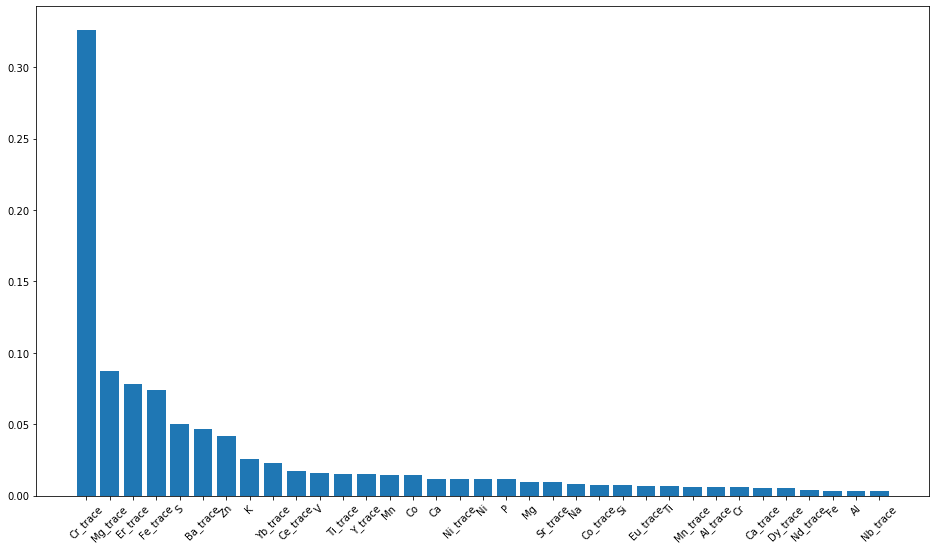

In [33]:
print(get_metrics(xg, X_train, X_test, y_train, y_test))
plot_importance(features, xg, 35)

In [34]:
# xgb = XGBClassifier(subsample=0.5, colsample_bytree=0.1, objective='multi:softmax', num_class = 9, 
#                     eval_metric = 'merror', seed=2020)

In [35]:
xgb = XGBClassifier(objective='multi:softmax', num_class = 5, 
                    eval_metric = 'merror', seed=2021)
xgb.fit(X_train, y_train)
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

#May not work since got the same scores

In [36]:
get_metrics(xgb, X_train, X_test, y_train, y_test)

Set    Recall  Precision
0  Train  1.000000   1.000000
1   Test  0.974212   0.974161

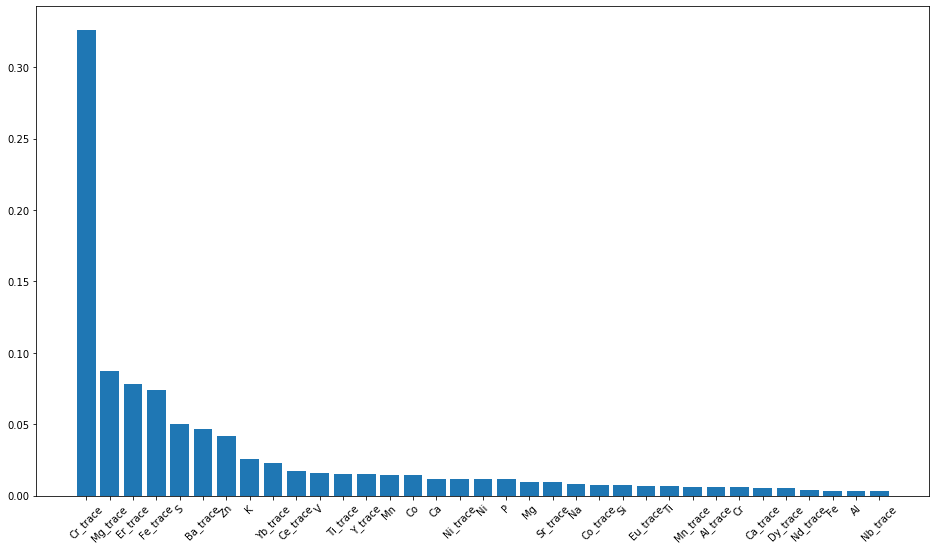

In [37]:
plot_importance(features, xgb, 35)

### Model Optimization

In [38]:
learning_rate = [0.01, 0.05, 0.1, 0.2, 1]
depth = [3, 4, 5, 6, 7]
min_split = [1, 2, 3, 4, 5]

In [39]:
# scorings = {'f1_samples': make_scorer(recall_score, average = 'samples'),
#            'f1_macro': make_scorer(f1_score, average = 'macro'),
#            'f1_weighted': make_scorer(f1_score, average = 'weighted')}

In [40]:
# scorings = {'accuracy': make_scorer(accuracy_score), 
#            'f1_samples': make_scorer(recall_score, average = 'samples'),
#            'f1_macro': make_scorer(f1_score, average = 'macro'),
#            'f1_weighted': make_scorer(f1_score, average = 'weighted')}

In [41]:
xgb = XGBClassifier(objective='multi:softmax', num_class = 5, 
                    eval_metric = 'merror', tree_method='hist', seed=2021)

In [42]:
xgb_cv = GridSearchCV(xgb, param_grid = {'eta': learning_rate, 'gamma': min_split, 'max_depth': depth}, 
                      cv=5, scoring='accuracy')
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='merror', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, num_class=5,
                                     num_parallel_tree=None,
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=None,
           

In [43]:
xgb_cv.best_params_

{'eta': 0.05, 'gamma': 1, 'max_depth': 7}

In [44]:
xgb_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.05,
              eval_metric='merror', gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.0500000007,
              max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_class=5, num_parallel_tree=1, objective='multi:softprob',
              random_state=2021, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, seed=2021, subsample=1, tree_method='hist',
              validate_parameters=1, ...)

In [45]:
xgb_cv.best_score_

0.9519300688481472

In [46]:
xgb_best = xgb_cv.best_estimator_

In [47]:
y_train_preds = xgb_best.predict(X_train)
y_test_preds = xgb_best.predict(X_test)

In [48]:
print(get_metrics(xgb_best, X_train, X_test, y_train, y_test))

     Set    Recall  Precision
0  Train  0.989957   0.990008
1   Test  0.957020   0.958586


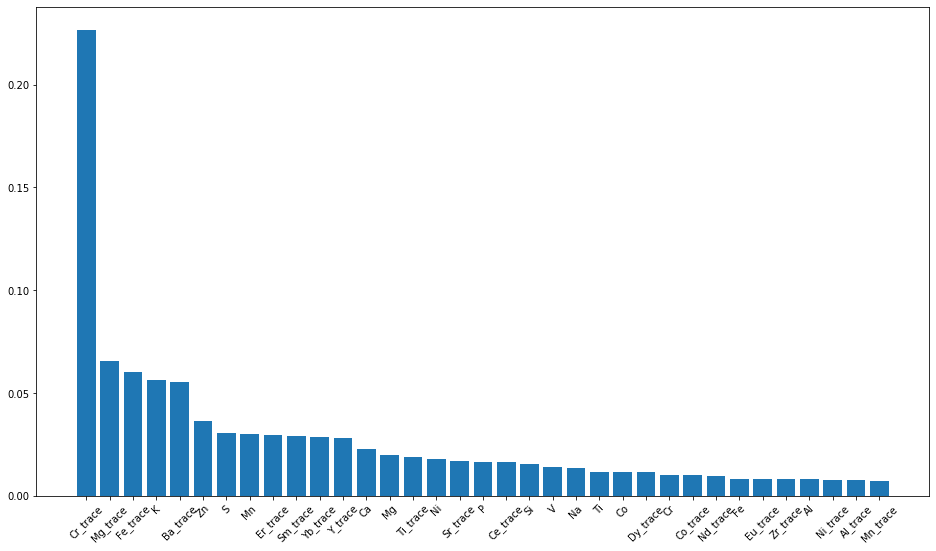

In [49]:
plot_importance(features, xgb_best, 35)

### ============ Save the best model ==================================

In [50]:
xgb_best = XGBClassifier(objective='multi:softmax', num_class = 5, 
                    eval_metric = 'merror', tree_method='hist', 
                    eta = 0.05, gamma = 1, max_depth = 7, seed=2021)
xgb_best.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.05,
              eval_metric='merror', gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.0500000007,
              max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_class=5, num_parallel_tree=1, objective='multi:softprob',
              random_state=2021, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, seed=2021, subsample=1, tree_method='hist',
              validate_parameters=1, ...)

In [51]:
y_train_preds = xgb_best.predict(X_train)
y_test_preds = xgb_best.predict(X_test)

In [52]:
print(get_metrics(xgb_best, X_train, X_test, y_train, y_test))

     Set    Recall  Precision
0  Train  0.989957   0.990008
1   Test  0.957020   0.958586


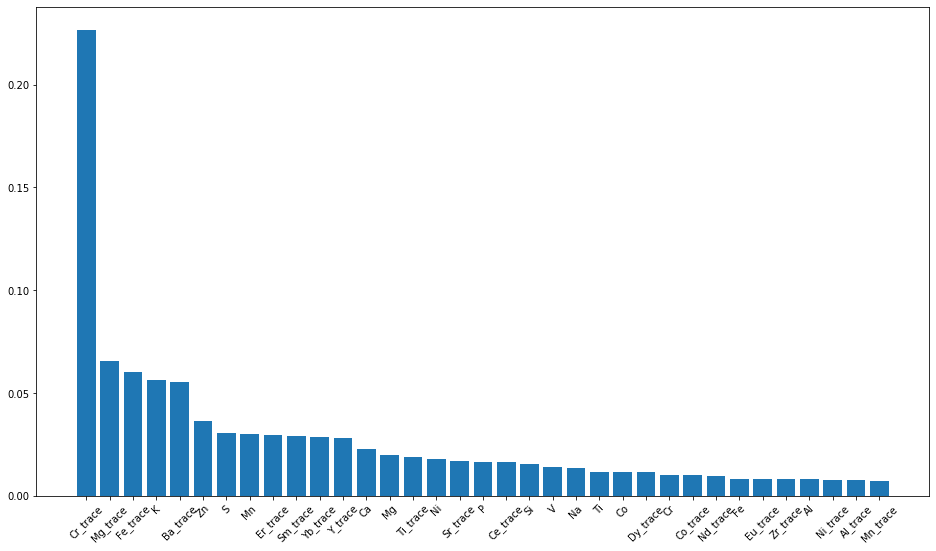

In [53]:
plot_importance(features, xgb_best, 35)

In [54]:
#pip install shap

In [55]:
import shap

In [56]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(xgb_best)
shap_values = explainer.shap_values(X_train)

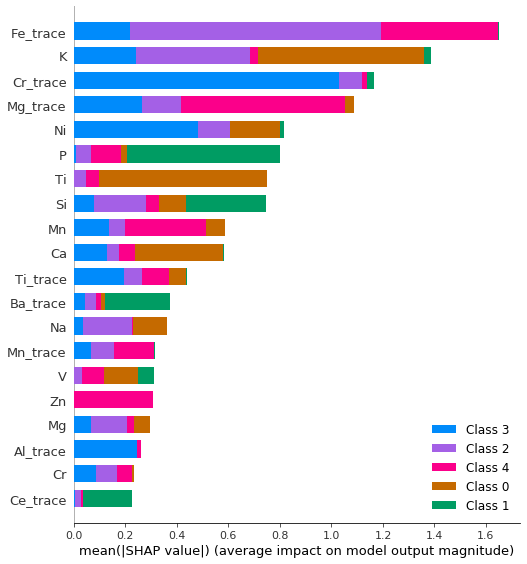

In [57]:
# take the mean absolute value of the SHAP values for 
# each feature to get a standard bar plot (produces stacked bars for multi-class outputs)
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Sampling

In [58]:
from imblearn.over_sampling import RandomOverSampler #
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
pd.options.display.max_columns = None # display all columns

In [59]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority', random_state=2021)

In [60]:
# fit and apply the transform
X_o_train, y_o_train = oversample.fit_resample(X_train, y_train)

In [61]:
# fit and apply the transform
X_o_train, y_o_train = oversample.fit_resample(X_o_train, y_o_train)

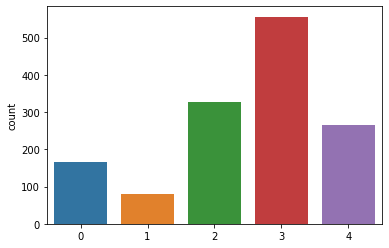

In [62]:
sns.countplot(y_train)

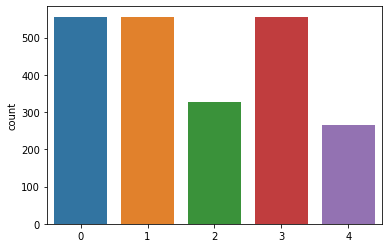

In [63]:
sns.countplot(y_o_train)

In [64]:
# fit and apply the transform 
## X 10 times
X_o_train, y_o_train = oversample.fit_resample(X_o_train, y_o_train)

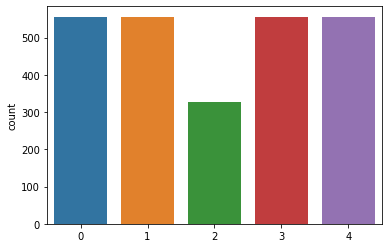

In [65]:
sns.countplot(y_o_train)

In [66]:
balance=pd.merge(pd.DataFrame(y_o_train), pd.DataFrame(X_o_train), left_index=True, right_index=True)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

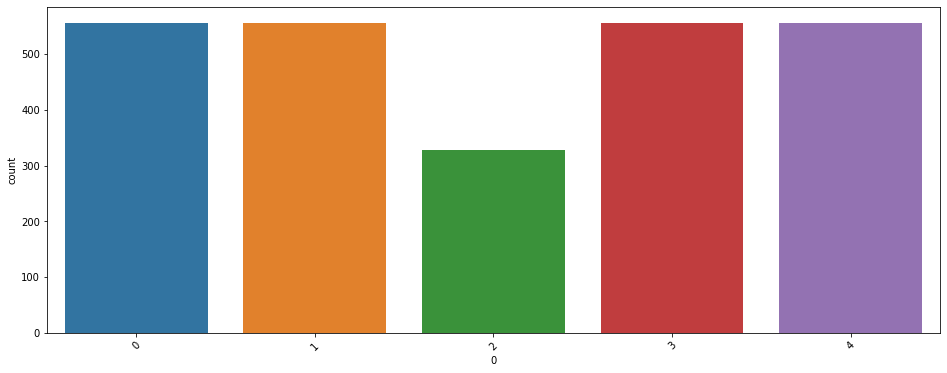

In [67]:
plt.figure(figsize=(16, 6))
sns.countplot(balance.iloc[:, 0])
plt.xticks(rotation=45)

In [68]:
xg_bala = XGBClassifier(random_state=2020)
xg_bala.fit(X_o_train, y_o_train)
y_train_preds = xg_bala.predict(X_o_train)
y_test_preds = xg_bala.predict(X_test)

In [69]:
print(get_metrics(xg_bala, X_o_train, X_test, y_o_train, y_test))

     Set    Recall  Precision
0  Train  1.000000   1.000000
1   Test  0.968481   0.968757


In [70]:
xgb = XGBClassifier(objective='multi:softmax', num_class = 5, 
                    eval_metric = 'merror', tree_method='hist', seed=2020)

In [71]:
xgb_cv = GridSearchCV(xgb, param_grid = {'eta': learning_rate, 'gamma': min_split, 'max_depth': depth}, 
                      cv=5, scoring='accuracy')
xgb_cv.fit(X_o_train, y_o_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='merror', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, num_class=5,
                                     num_parallel_tree=None,
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=None,
           

In [72]:
xgb_cv.best_params_

{'eta': 0.2, 'gamma': 1, 'max_depth': 6}

In [73]:
xgb_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.2,
              eval_metric='merror', gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.200000003,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_class=5, num_parallel_tree=1, objective='multi:softprob',
              random_state=2020, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, seed=2020, subsample=1, tree_method='hist',
              validate_parameters=1, ...)

In [74]:
xgb_cv.best_score_

0.9811933540539503

In [75]:
xgb_best = xgb_cv.best_estimator_

In [76]:
y_train_preds = xgb_best.predict(X_o_train)
y_test_preds = xgb_best.predict(X_test)

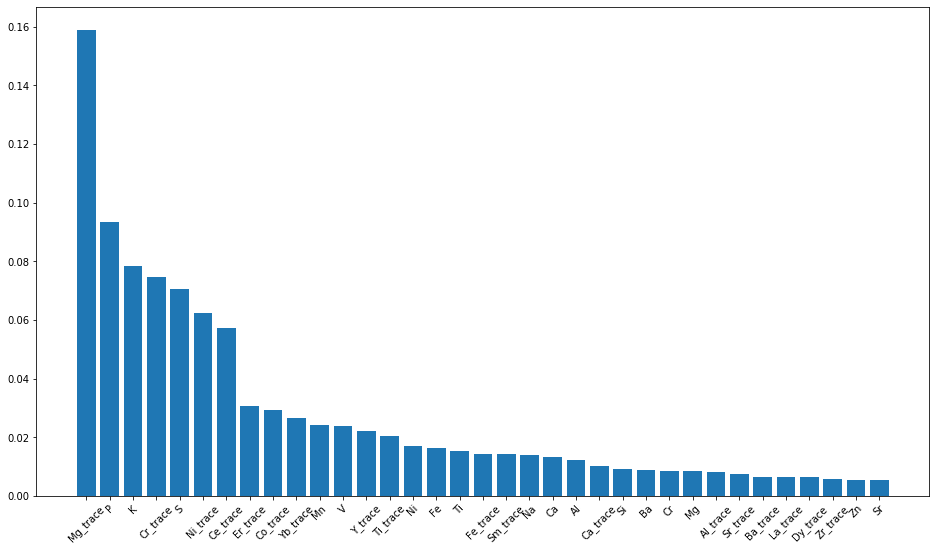

In [77]:
plot_importance(features, xgb_best, 35)

In [78]:
print(get_metrics(xgb_best, X_o_train, X_test, y_o_train, y_test))

     Set    Recall  Precision
0  Train  0.998041   0.998053
1   Test  0.959885   0.961741


In [79]:
xgb_best = XGBClassifier(objective='multi:softmax', num_class = 5, 
                    eval_metric = 'merror', tree_method='hist', 
                    eta = 0.1, gamma = 1, max_depth = 7, seed=2020)
xgb_best.fit(X_o_train, y_o_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1,
              eval_metric='merror', gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_class=5, num_parallel_tree=1, objective='multi:softprob',
              random_state=2020, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, seed=2020, subsample=1, tree_method='hist',
              validate_parameters=1, ...)

In [80]:
print(get_metrics(xgb_best, X_o_train, X_test, y_o_train, y_test))

     Set    Recall  Precision
0  Train  0.997649   0.997659
1   Test  0.957020   0.959778


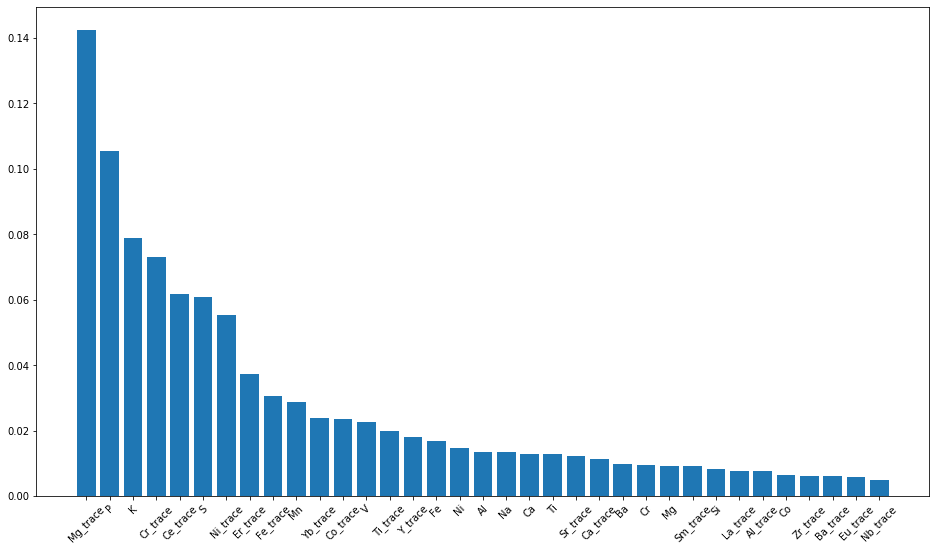

In [81]:
plot_importance(features, xgb_best, 35)

# Sampling Validation

In [82]:
X_o_train.head()

Si        Ti         Al        Cr    V        Mn         Mg  \
0   3.901361  0.839160   2.006426  0.225786  0.0  0.518848  12.954000   
1  19.464946  0.000599   0.005082  0.034894  0.0  0.075117  30.888780   
2        NaN       NaN        NaN       NaN  NaN       NaN        NaN   
3  19.154470  0.001798   0.001398  0.018473  0.0  0.076085  30.623593   
4  27.066860  0.000000  13.658520  0.000000  0.0  0.000000   0.000000   

          Ca   Sr   Ba        Na         P         K         Fe        Co  \
0  17.457492  0.0  0.0  2.106996  1.060938  4.904059  20.650059  0.000000   
1   0.018572  0.0  0.0  0.000000  0.000000  0.000000   5.474482  0.013175   
2        NaN  NaN  NaN       NaN       NaN       NaN        NaN       NaN   
3   0.012420  0.0  0.0  0.000000  0.000000  0.000000   5.676472  0.000000   
4   2.071470  0.0  0.0  0.000000  0.000000  1.742559   2.022228  0.000000   

         Ni      S   Zn  Cr_trace    Co_trace     Ni_trace  Sr_trace  Y_trace  \
0  0.000000  0.304  0.0       NaN         NaN          NaN       NaN      NaN   
1  0.292038  0.000  0.0   174.471  131.735245  2920.378552       NaN      NaN   
2       NaN    NaN  NaN     4.000         NaN     2.500000      26.0      4.0   
3  0.292612  0.000  0.0    92.367         NaN  2926.122750       NaN      NaN   
4  1.100120  1.240  0.0       NaN         NaN          NaN       NaN      NaN   

   Zr_trace  Nb_trace  Ba_trace  La_trace  Ce_trace  Nd_trace  Sm_trace  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2      13.0       1.6      48.0       NaN       NaN       NaN       NaN   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

   Eu_trace  Dy_trace  Er_trace  Yb_trace  Ti_trace    Fe_trace  Al_trace  \
0       NaN       NaN       NaN       NaN       NaN         NaN       NaN   
1       NaN       NaN       NaN       NaN     5.995  54711.0378  50.81280   
2       NaN       NaN       NaN       NaN   810.000    500.0000       NaN   
3       NaN       NaN       NaN       NaN    17.985  56729.6859  13.97352   
4       NaN       NaN       NaN       NaN       NaN         NaN       NaN   

     Ca_trace  Mn_trace     Mg_trace  
0         NaN       NaN          NaN  
1  185.822000   751.168  310483.7203  
2  615.000000     2.500          NaN  
3  124.272036   760.848  307818.1450  
4         NaN       NaN          NaN

In [83]:
#X_o_train.to_csv('X_o_train_Top5Craton_Oversampling', index=False)

In [84]:
#X_train.to_csv('X_train_Top5Craton_Oversampling', index=False)

In [85]:
#Y_train=pd.DataFrame()
#Y_train['y_train'] = y_train

In [86]:
#Y_o_train=pd.DataFrame()
#Y_o_train['y_o_train'] = y_o_train

In [87]:
#Y_o_train.to_csv('y_o_train_Top5Craton_Oversampling', index=False)

In [88]:
import sys
sys.path.insert(0,'..')

In [89]:
from monte_carlo_simulator import monte_carlo_simulator
from earth_data_plot import distribution_plot, logged_distribution_plot, correlation_plot
import warnings
warnings.filterwarnings('ignore')

In [90]:
X_train.columns

Index(['Si', 'Ti', 'Al', 'Cr', 'V', 'Mn', 'Mg', 'Ca', 'Sr', 'Ba', 'Na', 'P',
       'K', 'Fe', 'Co', 'Ni', 'S', 'Zn', 'Cr_trace', 'Co_trace', 'Ni_trace',
       'Sr_trace', 'Y_trace', 'Zr_trace', 'Nb_trace', 'Ba_trace', 'La_trace',
       'Ce_trace', 'Nd_trace', 'Sm_trace', 'Eu_trace', 'Dy_trace', 'Er_trace',
       'Yb_trace', 'Ti_trace', 'Fe_trace', 'Al_trace', 'Ca_trace', 'Mn_trace',
       'Mg_trace'],
      dtype='object')

In [91]:
num_cols= ['Si', 'Ti', 'Al', 'Cr', 'V', 'Mn', 'Mg', 'Ca', 'Sr', 'Ba', 'Na', 'P',
       'K', 'Fe', 'Co', 'Ni', 'S', 'Zn', 'Cr_trace', 'Co_trace', 'Ni_trace',
       'Sr_trace', 'Y_trace', 'Zr_trace', 'Nb_trace', 'Ba_trace', 'La_trace',
       'Ce_trace', 'Nd_trace', 'Sm_trace', 'Eu_trace', 'Dy_trace', 'Er_trace',
       'Yb_trace', 'Ti_trace', 'Fe_trace', 'Al_trace', 'Ca_trace', 'Mn_trace',
       'Mg_trace']

In [92]:
X_train[num_cols].isnull().mean().sort_values(ascending=False)

Y_trace     0.837877
Yb_trace    0.820660
Nb_trace    0.820660
Dy_trace    0.820660
Er_trace    0.820660
Eu_trace    0.820660
Sm_trace    0.819943
Nd_trace    0.817791
Ce_trace    0.816356
Zr_trace    0.808465
Ba_trace    0.796987
La_trace    0.767575
Sr_trace    0.761119
Co_trace    0.663558
Al_trace    0.659971
Mn_trace    0.644189
Cr_trace    0.642755
Ca_trace    0.619082
Mg_trace    0.613343
Ni_trace    0.601865
Fe_trace    0.598278
Ti_trace    0.473458
Sr          0.169297
Zn          0.169297
S           0.169297
Co          0.169297
Ba          0.164275
V           0.162123
P           0.124103
Ni          0.112626
Mn          0.098996
Na          0.097561
Ca          0.093974
Mg          0.093974
K           0.093974
Fe          0.093974
Cr          0.093974
Al          0.093974
Ti          0.093974
Si          0.093974
dtype: float64

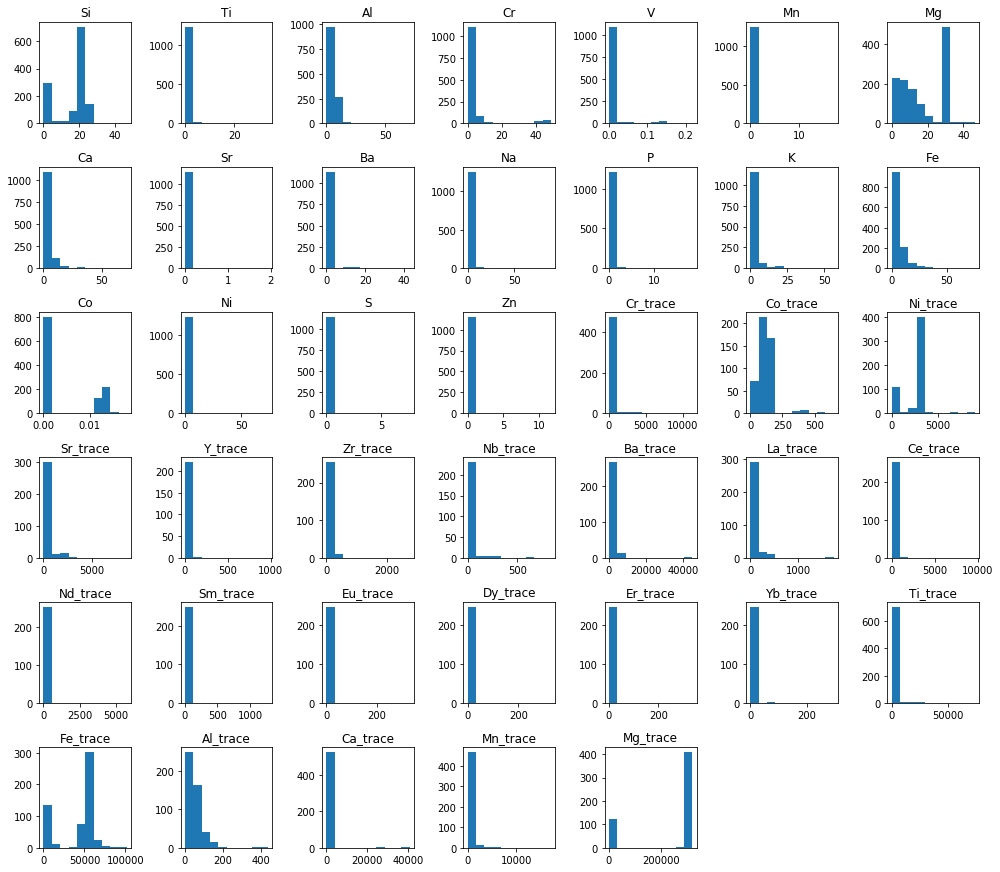

In [93]:
distribution_plot(num_cols, X_train)

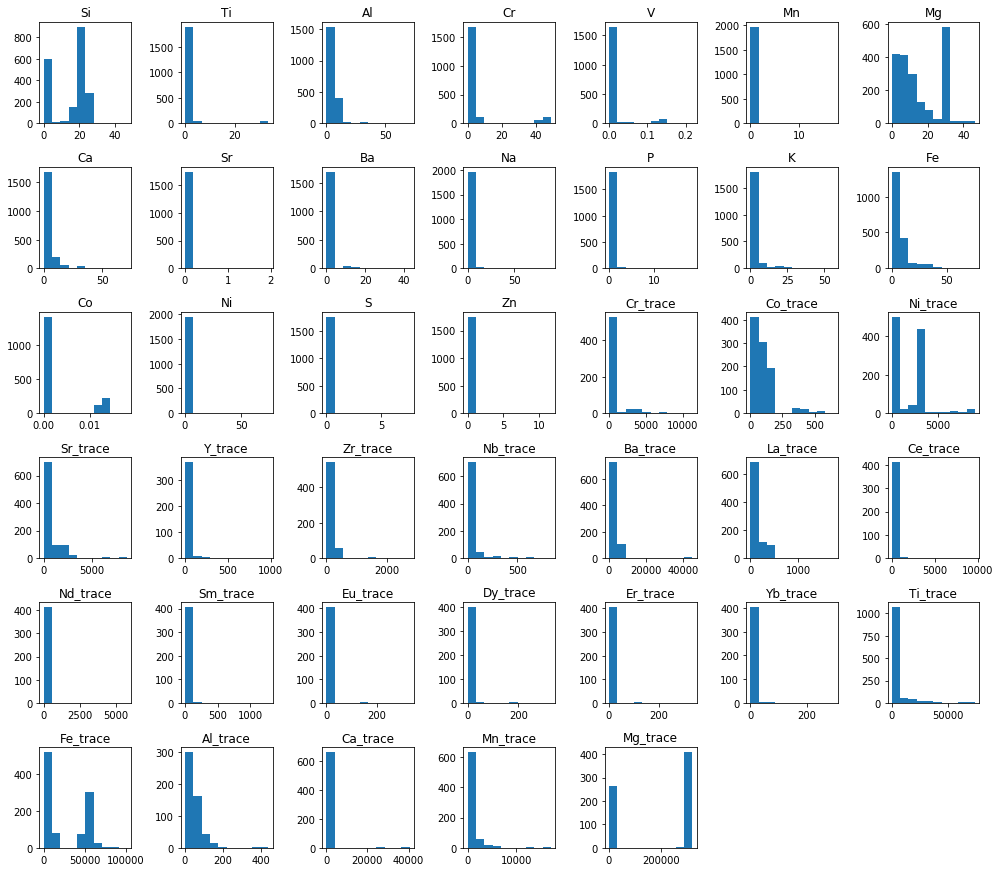

In [98]:
distribution_plot(num_cols, X_o_train)

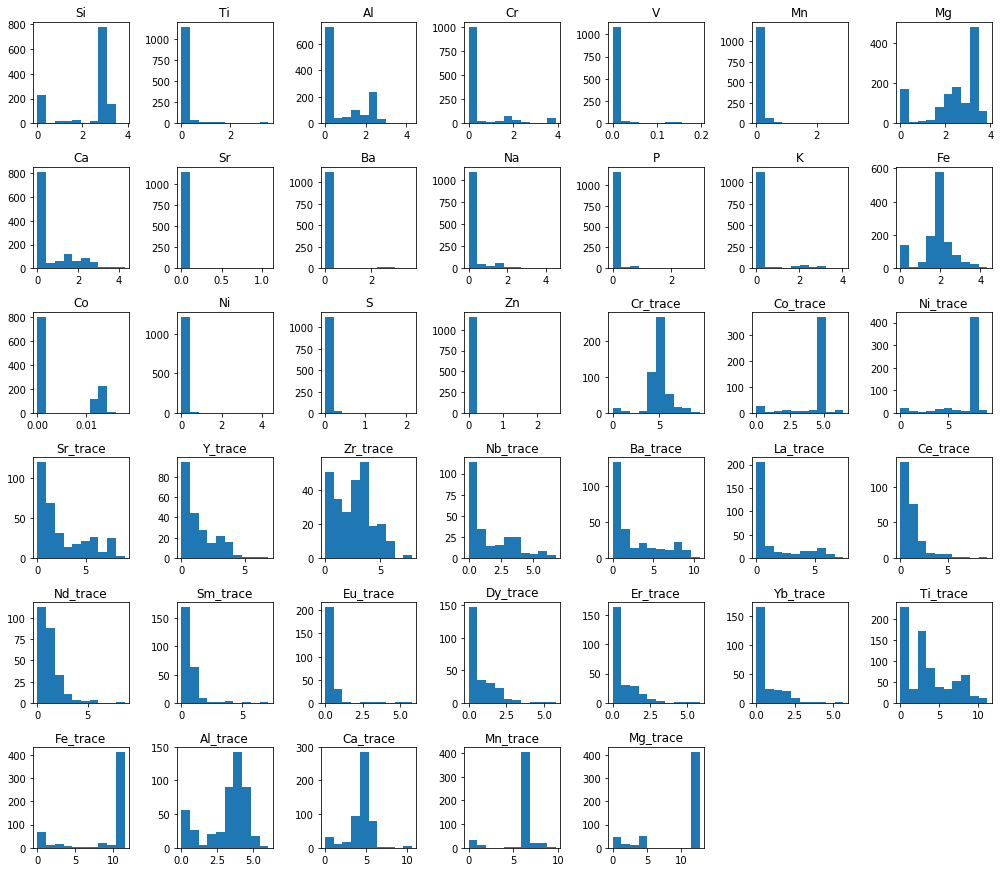

In [94]:
logged_distribution_plot(num_cols, X_train)

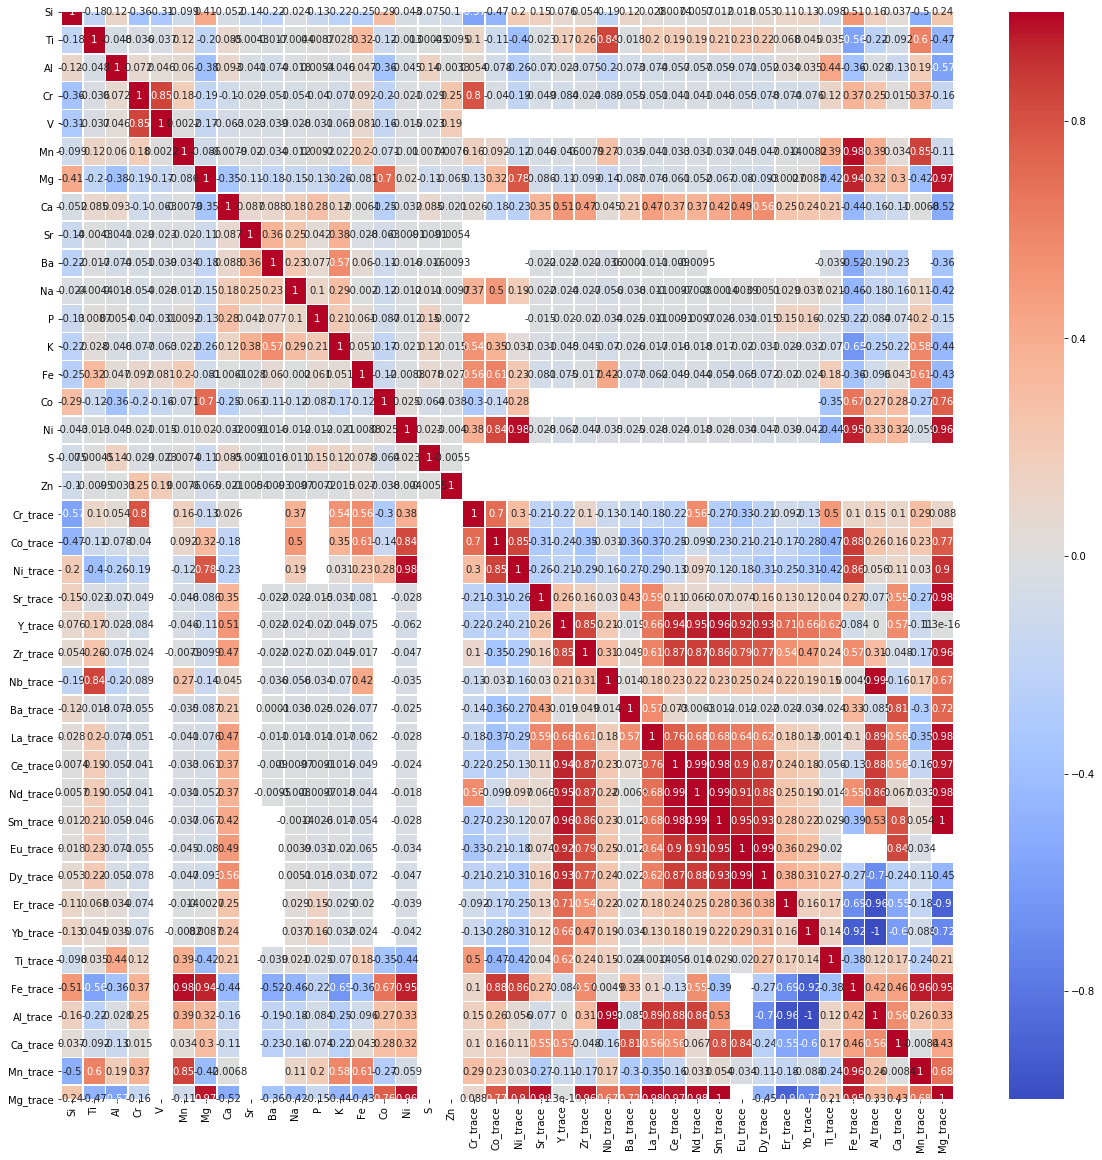

In [95]:
#correlation_plot(num_cols, X_train)

# Monte_carlo_simulator Evaluation: statistical differ caused by oversampling

In [96]:
# 100 simulations with Wilcoxon test
monte_carlo_simulator(X_train, X_o_train, sample_size = 50, 
                      iteration = 100, test = 'wilcoxon', confidence = 0.05)

Index(['V', 'Sr', 'Ba', 'P', 'Co', 'S', 'Zn', 'Cr_trace', 'Co_trace',
       'Ni_trace', 'Sr_trace', 'Y_trace', 'Zr_trace', 'Nb_trace', 'Ba_trace',
       'La_trace', 'Ce_trace', 'Nd_trace', 'Sm_trace', 'Eu_trace', 'Dy_trace',
       'Er_trace', 'Yb_trace', 'Ti_trace', 'Fe_trace', 'Al_trace', 'Ca_trace',
       'Mn_trace', 'Mg_trace'],
      dtype='object')

In [ ]:
# 100 simulations with Kruskal-Wallis test
monte_carlo_simulator(X_train, X_o_train, sample_size = 100,  
                      iteration = 100, test = 'kruskal', confidence = 0.05)

In [ ]:
# 1000 simulations with Wilcoxon test
monte_carlo_simulator(X_train, X_o_train, sample_size = 1000, 
                      iteration = 100, test = 'wilcoxon', confidence = 0.05)

In [ ]:
# 1000 simulations with Kruskal-Wallis test
monte_carlo_simulator(X_train, X_o_train, sample_size = 1000, 
                      iteration = 100, test = 'kruskal', confidence = 0.05)

# Use Probability Plots to see if the distributions before & after the oversampling statistically differ from each other

In [103]:
from earth_data_plot import probability_plot

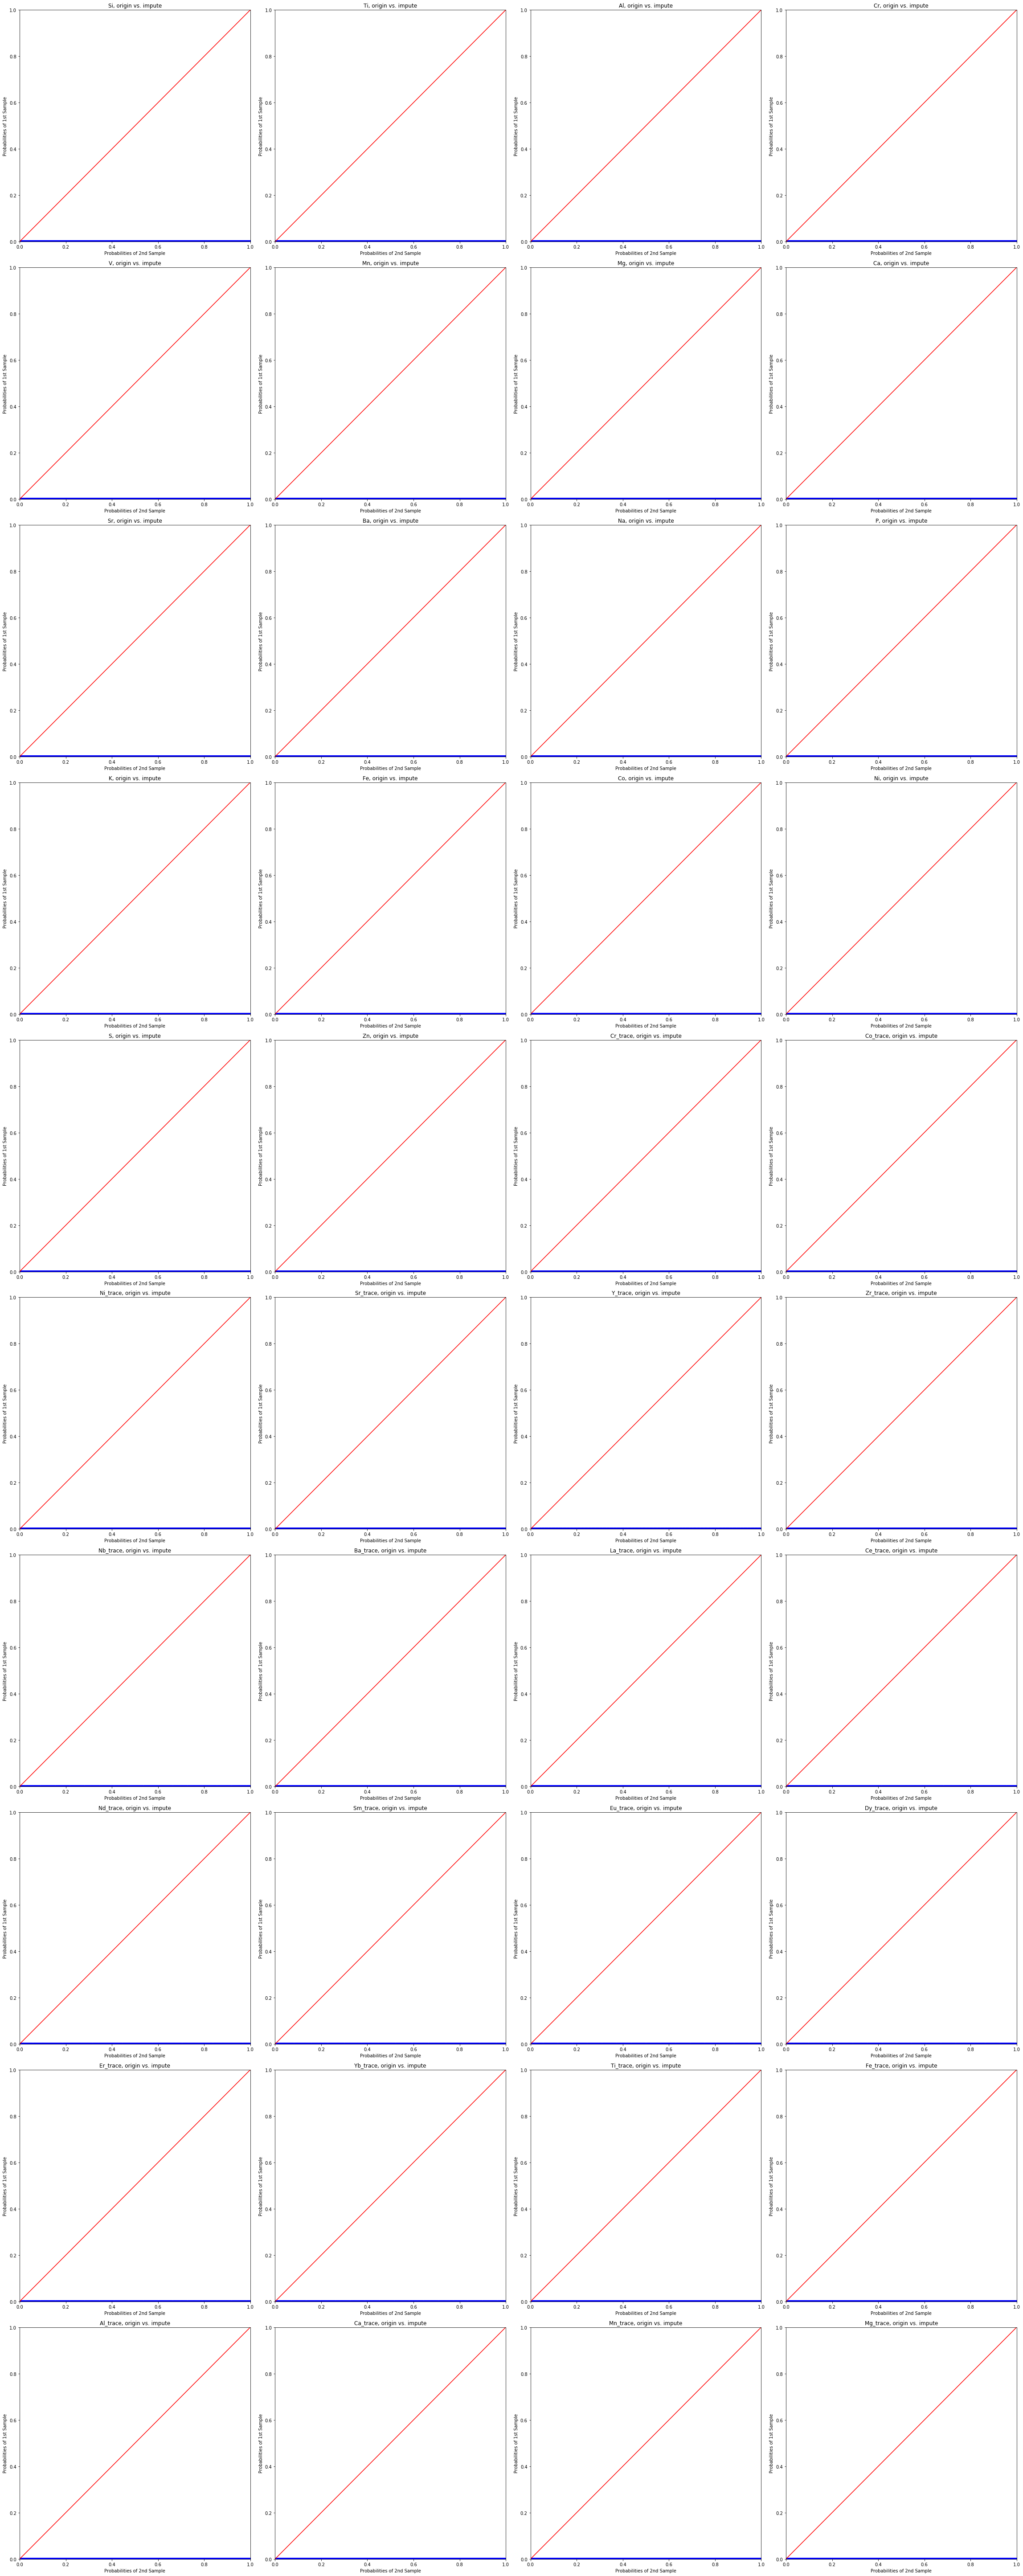

In [104]:
probability_plot(num_cols, X_train, X_o_train)

In [105]:
#probability_plot(num_cols, Y_train, Y_o_train)

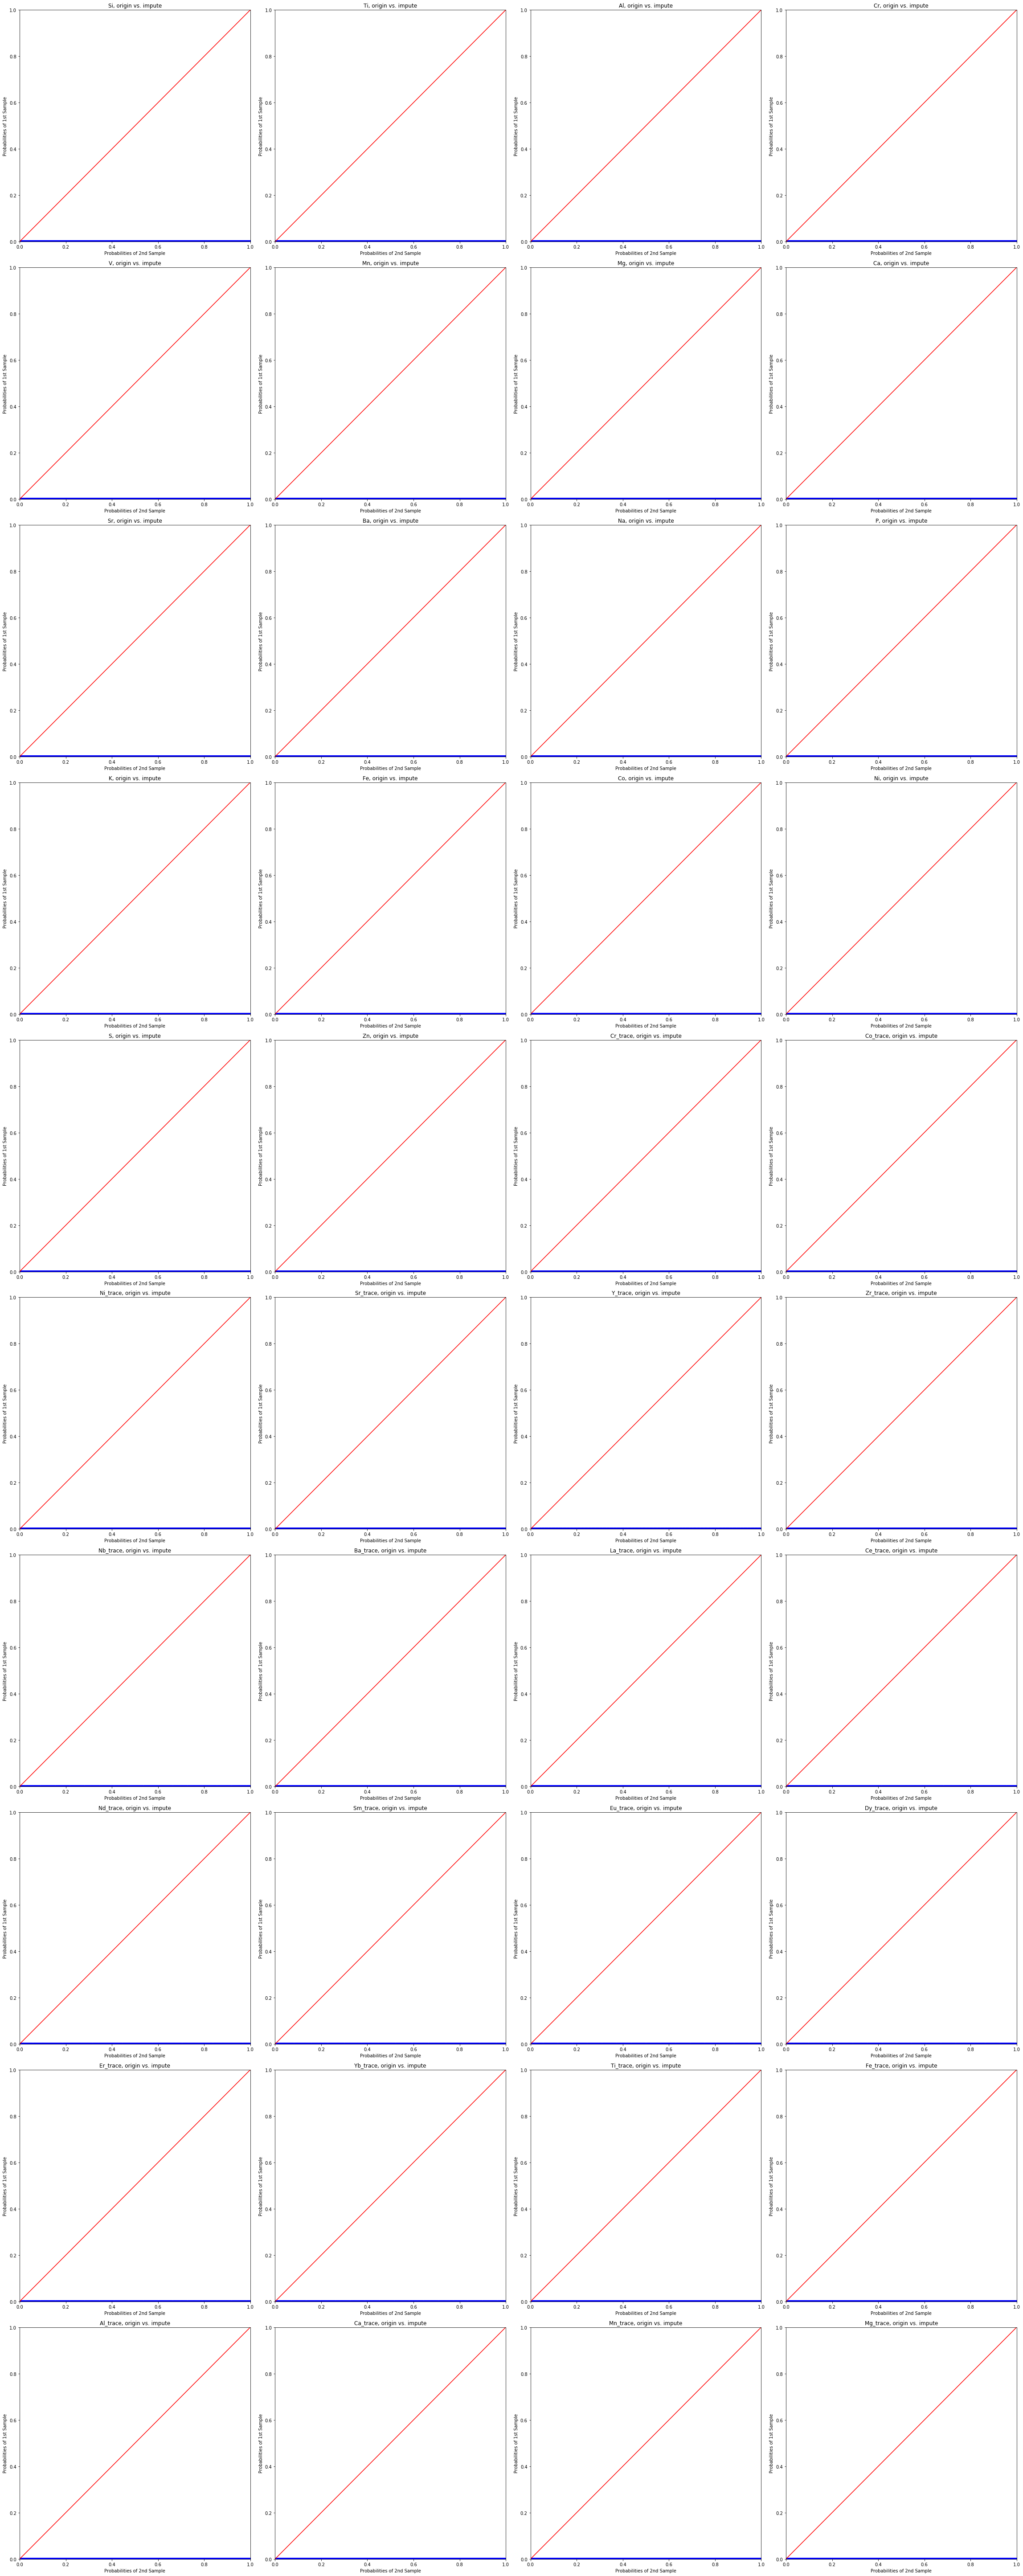

In [106]:
probability_plot(num_cols, X_train, X_train)

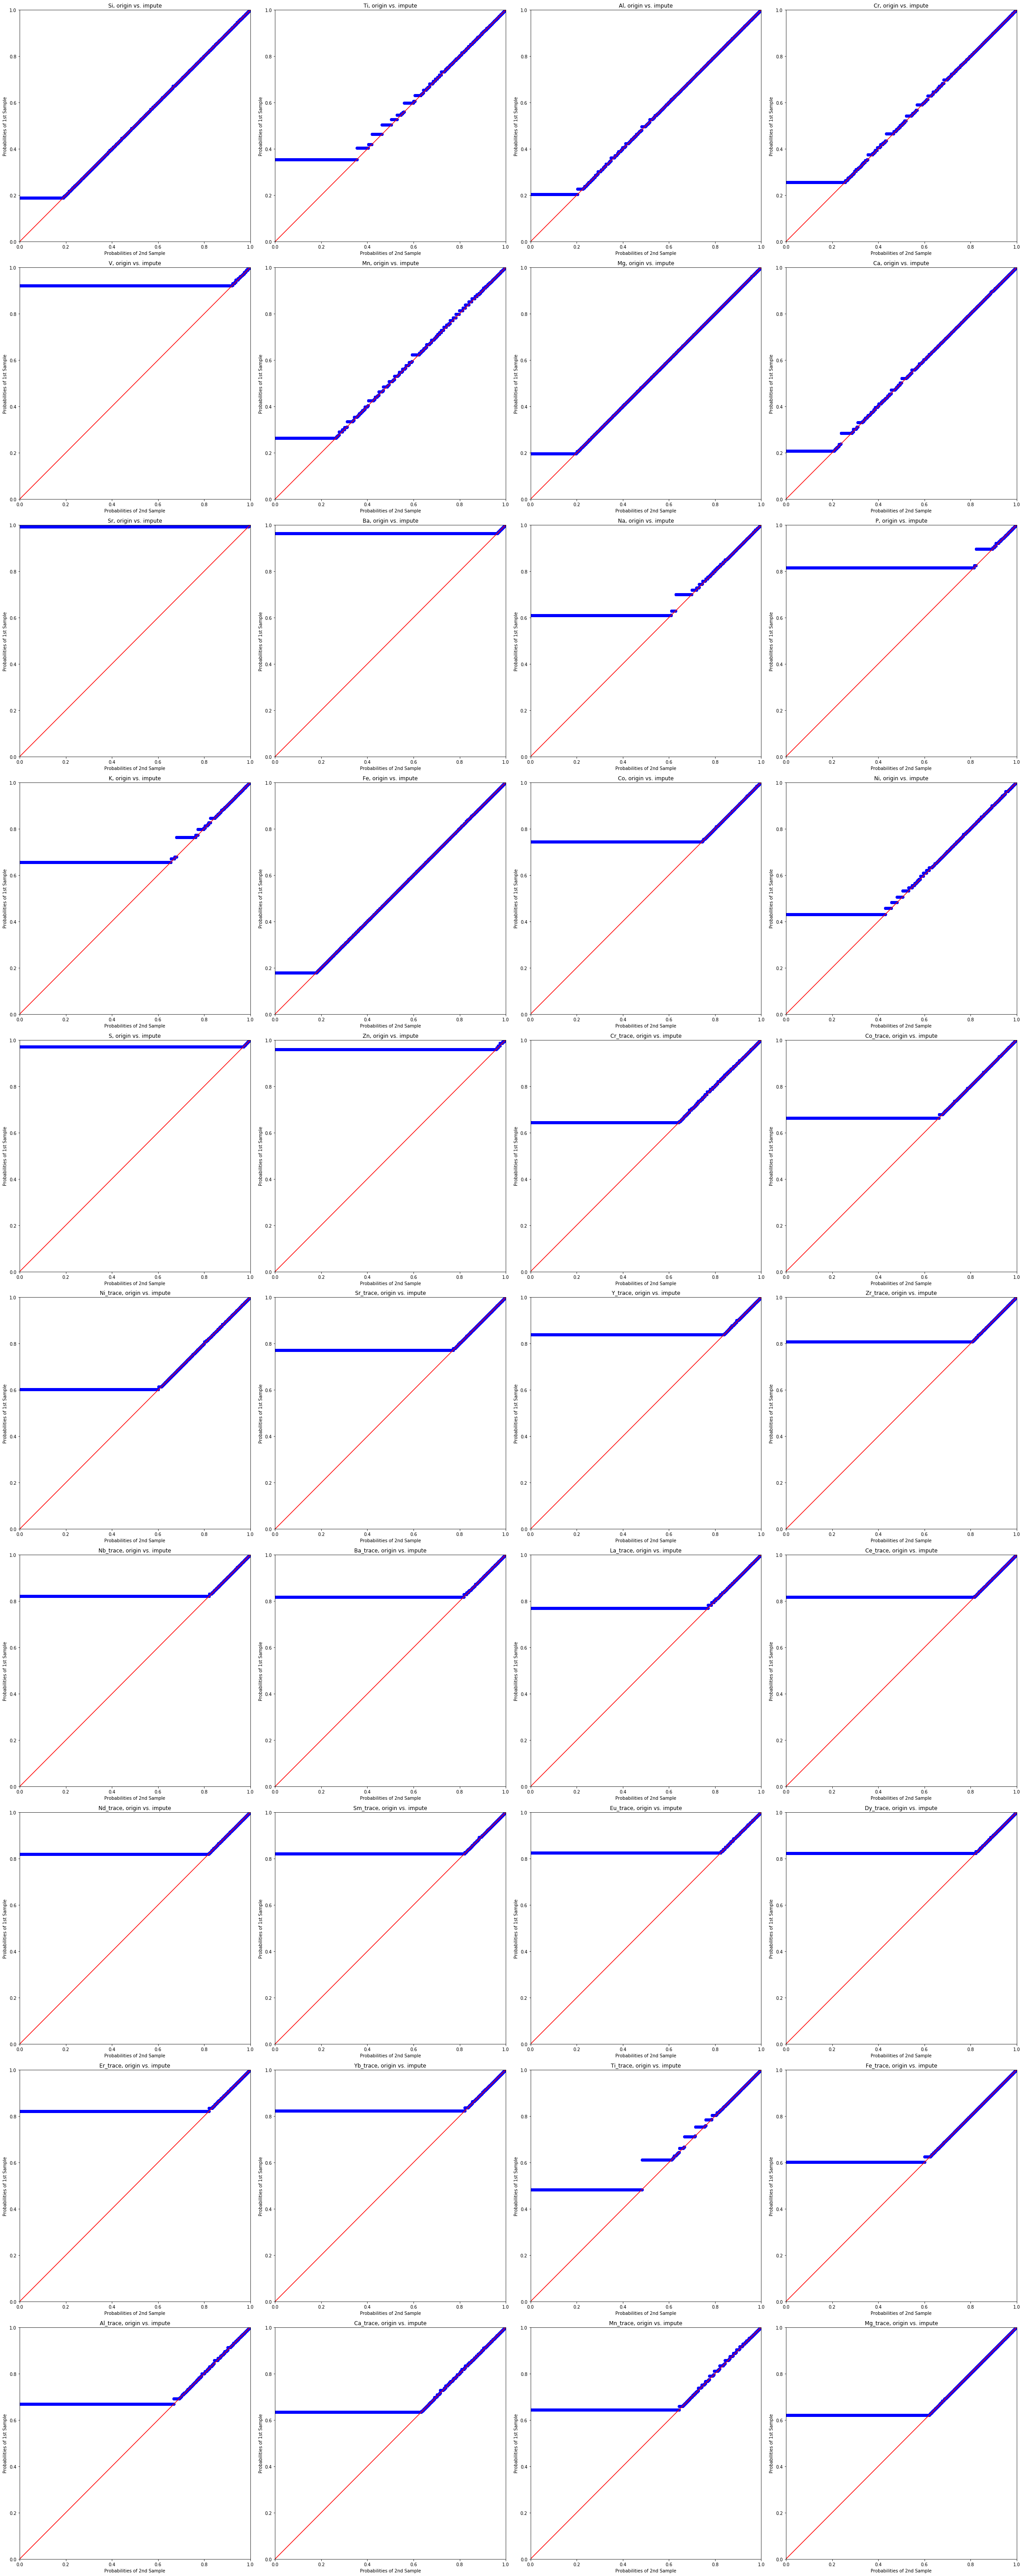

In [108]:
probability_plot(num_cols, X_train.fillna(0), X_train.fillna(0))

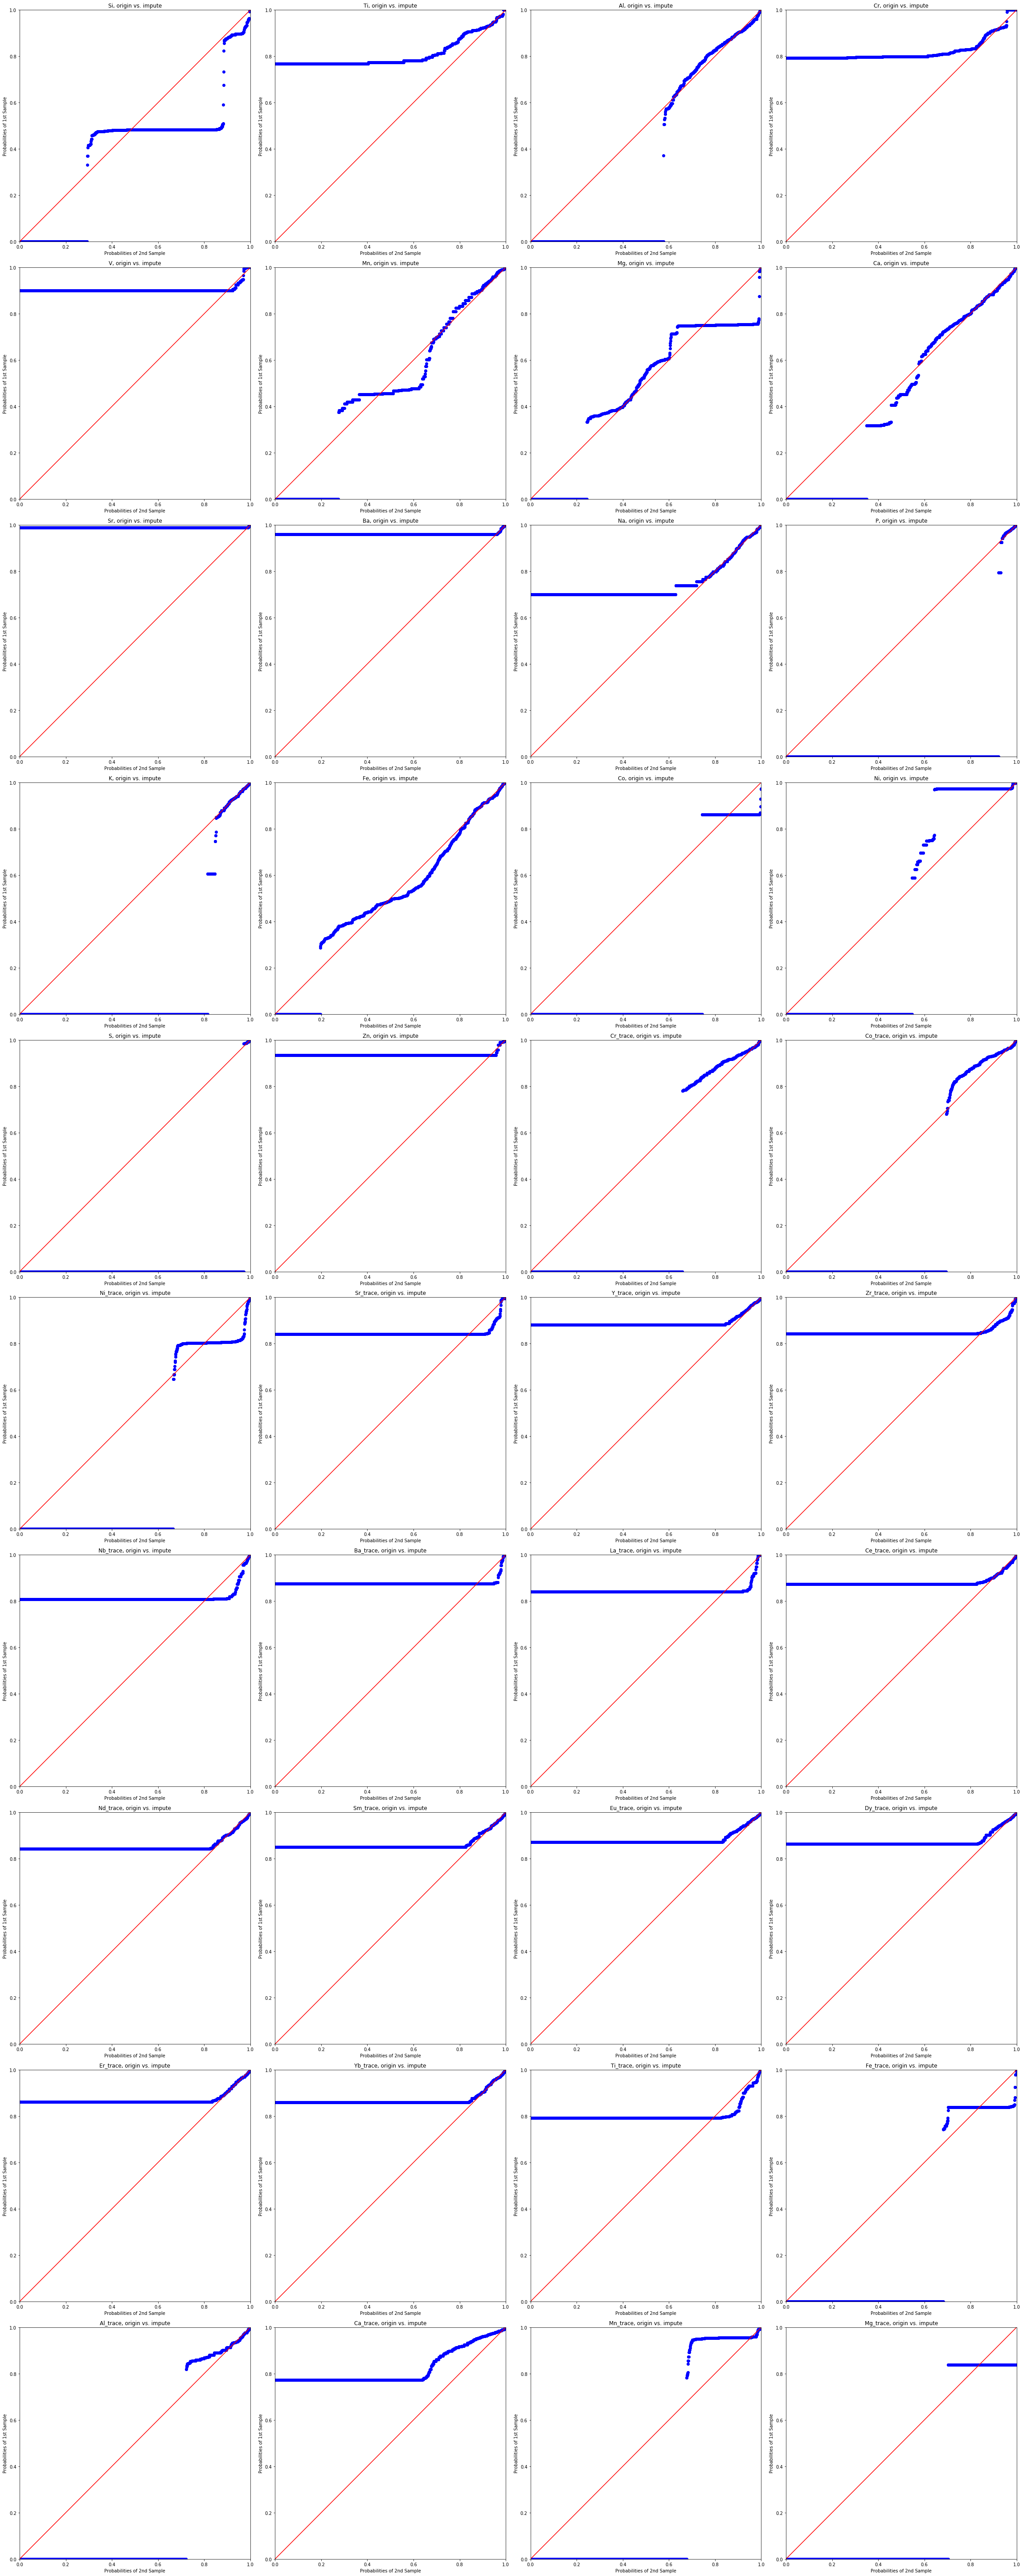

In [109]:
probability_plot(num_cols, X_train.fillna(0), X_o_train.fillna(0))